<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Classification with Python


Estimated time needed: **25** minutes
    

## Objectives

After completing this lab you will be able to:

* Confidently create classification models


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [88]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about the performance of basketball teams. The __cbb.csv__ data set includes performance data about five seasons of 354 basketball teams. It includes the following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|TEAM |	The Division I college basketball school|
|CONF|	The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)|
|G|	Number of games played|
|W|	Number of games won|
|ADJOE|	Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)|
|ADJDE|	Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)|
|BARTHAG|	Power Rating (Chance of beating an average Division I team)|
|EFG_O|	Effective Field Goal Percentage Shot|
|EFG_D|	Effective Field Goal Percentage Allowed|
|TOR|	Turnover Percentage Allowed (Turnover Rate)|
|TORD|	Turnover Percentage Committed (Steal Rate)|
|ORB|	Offensive Rebound Percentage|
|DRB|	Defensive Rebound Percentage|
|FTR|	Free Throw Rate (How often the given team shoots Free Throws)|
|FTRD|	Free Throw Rate Allowed|
|2P_O|	Two-Point Shooting Percentage|
|2P_D|	Two-Point Shooting Percentage Allowed|
|3P_O|	Three-Point Shooting Percentage|
|3P_D|	Three-Point Shooting Percentage Allowed|
|ADJ_T|	Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)|
|WAB|	Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)|
|POSTSEASON|	Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|
|SEED|	Seed in the NCAA March Madness Tournament|
|YEAR|	Season


### Load Data From CSV File  


Let's load the dataset [NB Need to provide link to csv file]


In [126]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,Houston,Amer,37,33,115.7,90.5,0.9439,52.1,42.5,16.5,...,37.3,51.3,43.0,35.5,27.9,67.3,7.8,S16,3.0,2019
1402,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0,2019
1403,Oregon,P12,38,25,108.1,91.7,0.8687,52.0,46.4,17.8,...,33.9,51.6,48.8,35.1,29.0,65.4,-1.1,S16,12.0,2019
1404,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,...,33.1,52.9,49.4,31.9,33.7,71.2,7.3,S16,3.0,2019


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1406 non-null   object 
 1   CONF        1406 non-null   object 
 2   G           1406 non-null   int64  
 3   W           1406 non-null   int64  
 4   ADJOE       1406 non-null   float64
 5   ADJDE       1406 non-null   float64
 6   BARTHAG     1406 non-null   float64
 7   EFG_O       1406 non-null   float64
 8   EFG_D       1406 non-null   float64
 9   TOR         1406 non-null   float64
 10  TORD        1406 non-null   float64
 11  ORB         1406 non-null   float64
 12  DRB         1406 non-null   float64
 13  FTR         1406 non-null   float64
 14  FTRD        1406 non-null   float64
 15  2P_O        1406 non-null   float64
 16  2P_D        1406 non-null   float64
 17  3P_O        1406 non-null   float64
 18  3P_D        1406 non-null   float64
 19  ADJ_T       1406 non-null  

## Add Column
Next we'll add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex" for short. 


In [91]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

# Data visualization and pre-processing



Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season. We'll also create a new dataframe that will hold the values with the new column.


In [92]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False
7,Oklahoma,B12,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,...,48.2,45.3,42.2,33.7,70.8,8.0,F4,2.0,2016,True
343,Duke,ACC,36,25,121.2,98.9,0.9122,53.7,49.5,14.3,...,51.0,48.9,38.5,34.0,68.7,4.2,S16,4.0,2016,False
344,Miami FL,ACC,35,27,119.4,96.5,0.9203,54.2,48.3,16.5,...,53.2,46.9,37.5,34.4,67.0,6.9,S16,3.0,2016,False
345,Indiana,B10,35,27,121.3,98.4,0.9168,58.7,49.8,19.6,...,56.1,49.0,41.6,34.3,69.5,3.2,S16,5.0,2016,False
346,Maryland,B10,35,26,114.9,96.3,0.8839,55.2,46.5,18.9,...,55.8,45.5,36.2,32.1,67.9,4.0,S16,5.0,2016,False


In [93]:
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

32 teams made it into the Sweet Sixteen, 16 into the Elite Eight, and 8 made it into the Final Four over 5 seasons. 


Lets plot some columns to underestand the data better:


In [94]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0



# All requested packages already installed.



  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




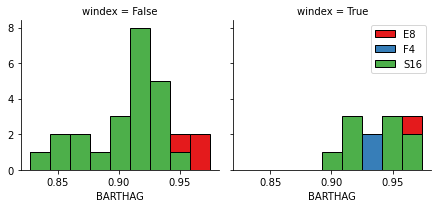

In [95]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

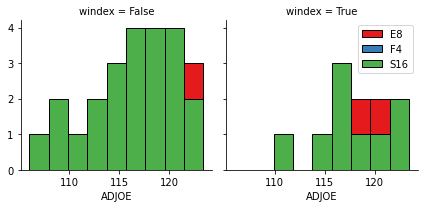

In [96]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at how Adjusted Defense Efficiency plots


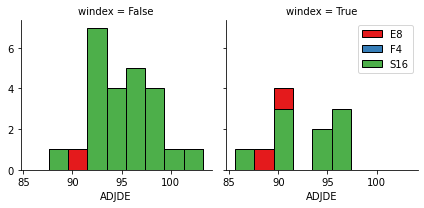

In [97]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that this data point doesn't impact the ability of a team to get into the Final Four. 


## Convert Categorical features to numerical values


Lets look at the postseason:


In [98]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

13% of teams with 6 or less wins above bubble make it into the final four while 17% of teams with 7 or more do.


Lets convert wins above bubble (winindex) under 7 to 0 and over 7 to 1:


In [99]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1

C:\Users\pandy\AppData\Local\Temp\ipykernel_10420\1140770989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0
7,Oklahoma,B12,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,...,48.2,45.3,42.2,33.7,70.8,8.0,F4,2.0,2016,1
343,Duke,ACC,36,25,121.2,98.9,0.9122,53.7,49.5,14.3,...,51.0,48.9,38.5,34.0,68.7,4.2,S16,4.0,2016,0
344,Miami FL,ACC,35,27,119.4,96.5,0.9203,54.2,48.3,16.5,...,53.2,46.9,37.5,34.4,67.0,6.9,S16,3.0,2016,0
345,Indiana,B10,35,27,121.3,98.4,0.9168,58.7,49.8,19.6,...,56.1,49.0,41.6,34.3,69.5,3.2,S16,5.0,2016,0
346,Maryland,B10,35,26,114.9,96.3,0.8839,55.2,46.5,18.9,...,55.8,45.5,36.2,32.1,67.9,4.0,S16,5.0,2016,0


### Feature selection


Let's define feature sets, X:


In [100]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0
7,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,17.7,31.2,...,33.0,28.3,48.2,45.3,42.2,33.7,70.8,8.0,2.0,1
343,36,25,121.2,98.9,0.9122,53.7,49.5,14.3,17.4,33.2,...,40.6,25.3,51.0,48.9,38.5,34.0,68.7,4.2,4.0,0
344,35,27,119.4,96.5,0.9203,54.2,48.3,16.5,17.4,30.1,...,40.7,29.1,53.2,46.9,37.5,34.4,67.0,6.9,3.0,0
345,35,27,121.3,98.4,0.9168,58.7,49.8,19.6,18.9,37.2,...,33.9,30.2,56.1,49.0,41.6,34.3,69.5,3.2,5.0,0
346,35,26,114.9,96.3,0.8839,55.2,46.5,18.9,16.4,29.1,...,37.0,27.0,55.8,45.5,36.2,32.1,67.9,4.0,5.0,0


What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|


In [101]:
y = df1['POSTSEASON'].values
y

array(['E8', 'E8', 'E8', 'E8', 'F4', 'F4', 'S16', 'S16', 'S16', 'S16',
       'S16', 'S16', 'S16', 'S16', 'E8', 'E8', 'E8', 'E8', 'F4', 'F4',
       'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'E8', 'E8',
       'E8', 'E8', 'F4', 'F4', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16',
       'S16', 'S16', 'E8', 'E8', 'E8', 'E8', 'F4', 'F4', 'S16', 'S16',
       'S16', 'S16', 'S16', 'S16', 'S16', 'S16'], dtype=object)

## Normalize Data 


Data Standardization gives data zero mean and unit variance (technically should be done after train test split )


In [102]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

## Training and Validation 


Split the data into Training and Validation data.


In [103]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


# Classification 


Now, it is your turn, use the training set to build an accurate model. Then use the validation set  to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



# K Nearest Neighbor(KNN)

<b>Question  1 </b> Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)


You can use <code> accuracy_score</cdoe>


In [104]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [105]:
KNN = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

In [106]:
from sklearn import metrics
y_hat_test = KNN.predict(X_val)
y_hat_train = KNN.predict(X_train)

print('Training accuracy score: %.4f'% metrics.accuracy_score(y_train,y_hat_train))
print('Testing accuracy score: %.4f'% metrics.accuracy_score(y_val,y_hat_test))

Training accuracy score: 0.6364
Testing accuracy score: 0.6667


<b>Question  2</b> Determine and print the accuracy for the first 15 values of k on the validation data:


In [107]:
K = 16
for n in range(1,K):
    KNN = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_hat_test = KNN.predict(X_val)
    y_hat_train = KNN.predict(X_train)
    Testing_accuracy = metrics.accuracy_score(y_val,y_hat_test)
    print ('For K =',n,',Testing accuracy: %.4f'%Testing_accuracy)

For K = 1 ,Testing accuracy: 0.3333
For K = 2 ,Testing accuracy: 0.3333
For K = 3 ,Testing accuracy: 0.5000
For K = 4 ,Testing accuracy: 0.5833
For K = 5 ,Testing accuracy: 0.6667
For K = 6 ,Testing accuracy: 0.5833
For K = 7 ,Testing accuracy: 0.5833
For K = 8 ,Testing accuracy: 0.6667
For K = 9 ,Testing accuracy: 0.5833
For K = 10 ,Testing accuracy: 0.5833
For K = 11 ,Testing accuracy: 0.5833
For K = 12 ,Testing accuracy: 0.5000
For K = 13 ,Testing accuracy: 0.5833
For K = 14 ,Testing accuracy: 0.5833
For K = 15 ,Testing accuracy: 0.5833


# Decision Tree


The following lines of code fit a <code>DecisionTreeClassifier</code>:


In [108]:
from sklearn.tree import DecisionTreeClassifier

<b>Question  3</b> Determine the minumum   value for the parameter <code>max_depth</code> that improves results 


In [109]:
for i in range(1,11):
    DT = DecisionTreeClassifier(criterion='entropy',max_depth = i)
    DT.fit(X_train,y_train)
    y_hat_test = DT.predict(X_val)
    y_hat_train = DT.predict(X_train)
    print('For max_depth=',i,'Model training accuracy: %.4f' % metrics.accuracy_score(y_train,y_hat_train),'Model testing accuracy: %.4f' % metrics.accuracy_score(y_val,y_hat_test))
print('As we can see that we get improved results for a minimum value of max depth = 6')

For max_depth= 1 Model training accuracy: 0.6591 Model testing accuracy: 0.6667
For max_depth= 2 Model training accuracy: 0.6818 Model testing accuracy: 0.6667
For max_depth= 3 Model training accuracy: 0.8409 Model testing accuracy: 0.5000
For max_depth= 4 Model training accuracy: 0.9318 Model testing accuracy: 0.3333
For max_depth= 5 Model training accuracy: 0.9773 Model testing accuracy: 0.5000
For max_depth= 6 Model training accuracy: 1.0000 Model testing accuracy: 0.5000
For max_depth= 7 Model training accuracy: 1.0000 Model testing accuracy: 0.5000
For max_depth= 8 Model training accuracy: 1.0000 Model testing accuracy: 0.4167
For max_depth= 9 Model training accuracy: 1.0000 Model testing accuracy: 0.5000
For max_depth= 10 Model training accuracy: 1.0000 Model testing accuracy: 0.5000
As we can see that we get improved results for a minimum value of max depth = 6


As we can see that we get improved results for a minimum value of max depth = 6

# Support Vector Machine


<b>Question  4</b> Train the support  vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.


In [110]:
from sklearn import svm

In [111]:
model = svm.SVC(kernel='rbf')
model.fit(X_train,y_train)
y_hat = model.predict(X_val)
print('For RBF kernal, accuracy: %.4f'% metrics.accuracy_score(y_hat,y_val))

model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)
y_hat = model.predict(X_val)
print('For linear kernal, accuracy: %.4f'% metrics.accuracy_score(y_hat,y_val))

model = svm.SVC(kernel='poly')
model.fit(X_train,y_train)
y_hat = model.predict(X_val)
print('For polynomial kernal, accuracy: %.4f' % metrics.accuracy_score(y_hat,y_val))

model = svm.SVC(kernel='sigmoid')
model.fit(X_train,y_train)
y_hat = model.predict(X_val)
print('For sigmoid kernal, accuracy: %.4f'% metrics.accuracy_score(y_hat,y_val))

print('Hence, the polynomial kernel provides the best score of 0.6667')

For RBF kernal, accuracy: 0.5833
For linear kernal, accuracy: 0.2500
For polynomial kernal, accuracy: 0.6667
For sigmoid kernal, accuracy: 0.5833
Hence, the polynomial kernel provides the best score of 0.6667


# Logistic Regression


<b>Question 5</b> Train a logistic regression model and determine the accuracy of the validation data (set C=0.01)


In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
model = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
y_hat = model.predict(X_val)
print('Accuracy score: %.4f' % metrics.accuracy_score(y_hat,y_val))

Accuracy score: 0.5833


# Model Evaluation using Test set


In [114]:
from sklearn.metrics import f1_score
# for f1_score please set the average parameter to 'micro'
from sklearn.metrics import log_loss

In [115]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

<b>Question  5</b> Calculate the  F1 score and Jaccard score for each model from above. Use the Hyperparameter that performed best on the validation data. **For f1_score please set the average parameter to 'micro'.**


### Load Test set for evaluation 


In [128]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df

C:\Users\pandy\AppData\Local\Temp\ipykernel_10420\1616051389.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,UCLA,P12,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,...,32.3,47.4,45.4,36.8,35.6,66.8,0.0,S16,11.0,NaN
1753,Utah,P12,34,25,114.9,88.7,0.9513,55.2,43.0,18.2,...,34.3,52.3,41.4,40.1,31.2,61.4,3.7,S16,5.0,NaN
1754,West Virginia,B12,35,25,110.3,93.3,0.8733,46.1,52.7,18.7,...,55.5,45.5,51.8,31.6,36.5,68.6,4.1,S16,5.0,NaN
1755,Wichita St.,MVC,34,29,114.3,91.5,0.9277,50.3,45.8,15.0,...,36.6,48.9,42.6,35.4,35.3,62.6,4.2,S16,7.0,NaN


In [129]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1757 non-null   object 
 1   CONF        1757 non-null   object 
 2   G           1757 non-null   int64  
 3   W           1757 non-null   int64  
 4   ADJOE       1757 non-null   float64
 5   ADJDE       1757 non-null   float64
 6   BARTHAG     1757 non-null   float64
 7   EFG_O       1757 non-null   float64
 8   EFG_D       1757 non-null   float64
 9   TOR         1757 non-null   float64
 10  TORD        1757 non-null   float64
 11  ORB         1757 non-null   float64
 12  DRB         1757 non-null   float64
 13  FTR         1757 non-null   float64
 14  FTRD        1757 non-null   float64
 15  2P_O        1757 non-null   float64
 16  2P_D        1757 non-null   float64
 17  3P_O        1757 non-null   float64
 18  3P_D        1757 non-null   float64
 19  ADJ_T       1757 non-null  

In [117]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

C:\Users\pandy\AppData\Local\Temp\ipykernel_10420\3609998696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)


array([[-4.08074446e-01, -1.10135297e+00,  3.37365934e-01,
         2.66479976e+00, -2.46831661e+00,  2.13703245e-01,
         9.44090550e-01, -1.19216365e+00, -1.64348924e+00,
         1.45405982e-02,  1.29523097e+00, -6.23533182e-01,
        -9.31788560e-01,  1.42784371e-01,  1.68876201e-01,
         2.84500844e-01,  1.62625961e+00, -8.36649260e-01,
        -9.98500539e-01,  4.84319174e-01, -6.77003200e-01],
       [ 3.63958290e-01,  3.26326807e-01,  7.03145068e-01,
        -7.13778644e-01,  1.07370841e+00,  4.82633172e-01,
         4.77498943e-01, -1.32975879e+00, -6.86193316e-02,
        -7.35448152e-01, -1.35447914e+00, -8.06829025e-01,
         3.41737757e-01,  4.96641291e-02,  9.40576311e-02,
         1.37214061e+00,  6.93854620e-01, -2.00860931e+00,
         9.80549967e-01, -1.19401460e+00,  1.47709789e+00],
       [ 3.63958290e-01,  1.18293467e+00,  9.31757027e-01,
        -8.78587347e-01,  1.23870131e+00,  7.85179340e-01,
        -9.22275877e-01,  5.27775662e-01, -1.86734575e

In [118]:
test_X

array([[-0.40807445, -1.10135297,  0.33736593, ..., -0.99850054,
         0.48431917, -0.6770032 ],
       [ 0.36395829,  0.32632681,  0.70314507, ...,  0.98054997,
        -1.1940146 ,  1.47709789],
       [ 0.36395829,  1.18293467,  0.93175703, ...,  1.92295497,
        -1.1940146 ,  1.47709789],
       ...,
       [-1.18010718, -0.81581702, -1.49152974, ..., -0.43305754,
         0.14865242, -0.6770032 ],
       [-1.95213992,  0.32632681, -0.5770819 , ..., -0.40164404,
         0.81998593, -0.6770032 ],
       [ 0.36395829, -1.38688893, -0.25702516, ..., -1.31263554,
         0.48431917, -0.6770032 ]])

In [119]:
test_y = test_df1['POSTSEASON'].values
test_y

array(['E8', 'E8', 'E8', 'E8', 'F4', 'F4', 'S16', 'S16', 'S16', 'S16',
       'S16', 'S16', 'S16', 'S16', 'E8', 'E8', 'E8', 'E8', 'F4', 'F4',
       'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'E8', 'E8',
       'E8', 'E8', 'F4', 'F4', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16',
       'S16', 'S16', 'E8', 'E8', 'E8', 'E8', 'F4', 'F4', 'S16', 'S16',
       'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'E8', 'E8', 'E8', 'E8',
       'F4', 'F4', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16'],
      dtype=object)

KNN


In [120]:
KNN = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
y_hat = KNN.predict(test_X)
print('The Jaccard score is,',jaccard_index(y_hat,test_y))
print('The F1 score is', f1_score(test_y,y_hat,average = 'micro'))

The Jaccard score is, 0.4583333333333333
The F1 score is 0.6285714285714286


Decision Tree


In [121]:
DT = DecisionTreeClassifier(criterion='entropy',max_depth = 6)
DT.fit(X_train,y_train)
y_hat = DT.predict(test_X)
print('The Jaccard score is,',jaccard_index(y_hat,test_y))
print('The F1 score is', f1_score(test_y,y_hat,average = 'micro'))

The Jaccard score is, 0.6091954022988506
The F1 score is 0.7571428571428571


SVM


In [122]:
model = svm.SVC(kernel='poly')
model.fit(X_train,y_train)
y_hat = model.predict(test_X)
print('The Jaccard score is,',jaccard_index(y_hat,test_y))
print('The F1 score is', f1_score(test_y,y_hat,average = 'micro'))

The Jaccard score is, 0.5217391304347826
The F1 score is 0.6857142857142857


Logistic Regression


In [123]:
model = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
y_hat = model.predict(test_X)
print('The Jaccard score is,',jaccard_index(y_hat,test_y))
print('The F1 score is', f1_score(test_y,y_hat,average = 'micro'))

The Jaccard score is, 0.4
The F1 score is 0.5714285714285714


In [124]:
y_hat_prob = model.predict_proba(test_X)
log_loss(test_y, y_hat_prob)

0.8782725835310187

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Accuracy | Jaccard  | F1-score  | LogLoss |
|--------------------|----------|----------|-----------|---------|
| KNN                |  0.6667  |  0.4583  |  0.6286   |   NA    |
| Decision Tree      |  0.5000  |  0.6092  |  0.7571   |   NA    |
| SVM                |  0.6667  |  0.5217  |  0.6857   |   NA    |
| LogisticRegression |  0.5833  |  0.4000  |  0.5714   | 0.8783  |


Something to keep in mind when creating models to predict the results of basketball tournaments or sports in general is that is quite hard due to so many factors influencing the game. Even in sports betting an accuracy of 55% and over is considered good as it indicates profits.


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_source=Exinfluencer&utm_content=000026UJ&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01&utm_medium=Exinfluencer&utm_term=10006555">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_source=Exinfluencer&utm_content=000026UJ&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01&utm_medium=Exinfluencer&utm_term=10006555">Watson Studio</a>



### Thank you for completing this lab!


## Author

Saeed Aghabozorgi


### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Joseph Santarcangelo</a>




## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
|2021-04-03   | 2.1  | Malika Singla| Updated the Report accuracy |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
